# Import Pertinent Libraries/Load Dataset

#### Importing Libraries

In [1]:
import sqlite3
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

####  Loading Dataset/Tables

In [2]:
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [4]:
cur.execute('''SELECT * FROM Product''')
product_data = pd.DataFrame(cur.fetchall())
product_data.columns = [x[0] for x in cur.description]
display(len(product_data))
product_data.head(1)

77

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0


In [5]:
#Column ID should be named ProductId for easier calling of data

In [6]:
cur.execute('''SELECT * FROM Supplier''')
supplier_data = pd.DataFrame(cur.fetchall())
supplier_data.columns = [x[0] for x in cur.description]
display(len(supplier_data))
supplier_data.head(1)

29

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None


In [7]:
cur.execute('''SELECT * FROM Region''')
region_data = pd.DataFrame(cur.fetchall())
region_data.columns = [x[0] for x in cur.description]
display(len(region_data))
region_data.head(1)

4

,Id,RegionDescription
0,1,Eastern


In [8]:
cur.execute('''SELECT * FROM [Order]''')
order_data = pd.DataFrame(cur.fetchall())
order_data.columns = [x[0] for x in cur.description]
display(len(order_data))
order_data.head(1)

830

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France


In [9]:
cur.execute('''SELECT * FROM OrderDetail''')
order_detail_data = pd.DataFrame(cur.fetchall())
order_detail_data.columns = [x[0] for x in cur.description]
display(len(order_detail_data))
order_detail_data.head(1)

2155

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0


In [10]:
cur.execute('''SELECT * FROM Category''')
category_data = pd.DataFrame(cur.fetchall())
category_data.columns = [x[0] for x in cur.description]
display(len(category_data))
category_data.head(1)

8

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [11]:
cur.execute('''SELECT * FROM Employee''')
employee_data = pd.DataFrame(cur.fetchall())
employee_data.columns = [x[0] for x in cur.description]
display(len(employee_data))
employee_data.head(1)

9

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp


In [12]:
cur.execute('''SELECT * FROM EmployeeTerritory''')
employee_territory_data = pd.DataFrame(cur.fetchall())
employee_territory_data.columns = [x[0] for x in cur.description]
display(len(employee_territory_data))
employee_territory_data.head()

49

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [13]:
cur.execute('''SELECT * FROM Territory''')
territory_data = pd.DataFrame(cur.fetchall())
territory_data.columns = [x[0] for x in cur.description]
display(len(territory_data))
territory_data.head()

53

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [14]:
cur.execute('''SELECT * FROM Customer''')
customer_data = pd.DataFrame(cur.fetchall())
customer_data.columns = [x[0] for x in cur.description]
display(len(customer_data))
customer_data.head()

91

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [15]:
cur.execute('''SELECT * FROM Shipper''')
shipper_data = pd.DataFrame(cur.fetchall())
shipper_data.columns = [x[0] for x in cur.description]
display(len(shipper_data))
shipper_data.head()

3

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


The below tables contain no data. Will be omitted during Data inspection, cleaning, and, EDA. BBRING TO SHAREHOLDERS' ATTENTION

In [16]:
cur.execute('''SELECT * FROM CustomerCustomerDemo''')
customer_customer_demo_data = pd.DataFrame(cur.fetchall())
display(len(customer_customer_demo_data))
customer_customer_demo_data.head()

0

""


In [17]:
cur.execute('''SELECT * FROM CustomerDemographic''')
customer_demographic_data = pd.DataFrame(cur.fetchall())
display(len(customer_demographic_data))
customer_demographic_data.head()

0

""


# Data Inspection and Cleaning

#### Checking data type/missing data points/duplicates

In [18]:
#needed a function to streamline inspection
def data_inspector(df):
    duplicates = df[df.duplicated()]
    display('----Missing Values----',df.isna().sum())
    display('----Duplicate Values----')
    display(str(len(duplicates))  + ' duplicates')
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n\n')

In [19]:
frames_dict = {'product data': product_data, 'supplier data': supplier_data, 'order data': order_data, 
          'order detail data': order_detail_data, 'category': category_data, 'employee data': employee_data, 
          'employee territory data': employee_territory_data, 'territory data': territory_data, 
          'customer data': customer_data, 'shipper data': shipper_data, 'region data' :region_data}

In [20]:
frames = [product_data, supplier_data, order_data, order_detail_data, category_data, employee_data, 
          employee_territory_data, territory_data, customer_data, shipper_data, region_data]
for i in frames:
    for key in frames_dict:
        print('--------------------------------', key.upper(), '--------------------------------')
        data_inspector(i)

-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

-------------------------------- ORDER DETAIL DATA --------------------------------


'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gravad lax                

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Forêts d'érables                          0.034483
Leka Trading                              0.034483
PB Knäckebröd AB                          0.034483
Ma Maison                                 0.034483
Heli Süßwaren GmbH & Co. KG               0.034483
Pavlova, Ltd.                             0.034483
Aux joyeux ecclésiastiques                0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
Gai pâturage                              0.034483
Exotic Liquids                            0.034483
Karkki O

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipCountry 
 USA            0.146988
Germany        0.146988
Brazil         0.100000
France         0.092771
UK             0.067470
Venezuela      0.055422
Austria        0.048193
Sweden         0.044578
Canada         0.036145
Italy          0.033735
Mexico         0.033735
Spain          0.027711
Finland        0.026506
Belgium        0.022892
Ireland        0.022892
Denmark        0.021687
Switzerland    0.021687
Argentina      0.019277
Portugal       0.015663
Poland         0.008434
Norway         0.007229
Name: ShipCountry, dtype: float64 


-------------------------------- SUPPLIER DATA --------------------------------


'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipPostalCode, Length: 84, dtype: float64 


ShipCountry 
 USA            0.146988
Germany        0.146988
Brazil         0.100000
France         0.092771
UK             0.067470
Venezuela      0.055422
Austria        0.048193
Sweden         0.044578
Canada         0.036145
Italy          0.033735
Mexico         0.033735
Spain          0.027711
Finland        0.026506
Belgium        0.022892
Ireland        0.022892
Denmark        0.021687
Switzerland    0.021687
Argentina      0.019277
Portugal       0.015663
Poland         0.008434
Norway         0.007229
Name: ShipCountry, dtype: float64 


-------------------------------- ORDER DATA --------------------------------


'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipAddress, Length: 89, dtype: float64 


ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Cork               0.022892
Bräcke             0.022892
Albuquerque        0.021687
San Cristóbal      0.021687
Luleå              0.021687
Marseille          0.020482
Buenos Aires       0.019277
Frankfurt a.M.     0.018072
München            0.018072
Oulu               0.018072
Barquisimeto       0.016867
Brandenburg        0.016867
Seattle            0.016867
Tsawassen          0.016867
Toulouse           0.016867
Colchester         0.015663
Lisboa             0.015663
Montréal           0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Strasbourg         0.013253
                     ...   
Köln               0.012048
Campinas           0.010843
Lander          

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipAddress 
 187 Suffolk Ln.                                   0.037349
Kirchgasse 6                                      0.036145
Taucherstraße 10                                  0.033735
8 Johnstown Road                                  0.022892
Åkergatan 24                                      0.022892
Carrera 22 con Ave. Carlos Soublette #8-35        0.021687
2817 Milton Dr.                                   0.021687
Berguvsvägen  8                                   0.021687
12, rue des Bouchers                              0.020482
Magazinweg 7                                      0.018072
Torikatu 38                                       0.018072
Berliner Platz 43                                 0.018072
1029 - 12th Ave. S.                               0.016867
Carrera 52 con Ave. Bolívar #65-98 Llano Largo    0.016867
Rua do Paço, 67                                   0.016867
1 rue Alsace-Lorraine                             0.016867
23 Tsawassen Blvd.                        

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Cork               0.022892
Bräcke             0.022892
Albuquerque        0.021687
San Cristóbal      0.021687
Luleå              0.021687
Marseille          0.020482
Buenos Aires       0.019277
Frankfurt a.M.     0.018072
München            0.018072
Oulu               0.018072
Barquisimeto       0.016867
Brandenburg        0.016867
Seattle            0.016867
Tsawassen          0.016867
Toulouse           0.016867
Colchester         0.015663
Lisboa             0.015663
Montréal           0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Strasbourg         0.013253
                     ...   
Köln               0.012048
Campinas           0.010843
Lander             0.010843
Resende            0.010843
Bern     

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipPostalCode 
 83720        0.038224
8010         0.036991
01307        0.034525
S-844 67     0.023428
S-958 22     0.022195
5022         0.022195
87110        0.022195
13008        0.020962
1010         0.019729
05033        0.019729
90110        0.018496
80805        0.018496
60528        0.018496
T2F 8M4      0.017263
98124        0.017263
05454-876    0.017263
31000        0.017263
14776        0.017263
3508         0.017263
CO7 6JX      0.016030
H1J 1C3      0.016030
05487-020    0.016030
42100        0.014797
4980         0.014797
B-6000       0.014797
97403        0.013564
8200         0.013564
67000        0.013564
02389-890    0.013564
24100        0.012330
               ...   
68306        0.008631
B-1180       0.008631
05634-030    0.007398
52066        0.007398
10100        0.007398
4110         0.007398
44087        0.007398
12209        0.007398
1756         0.006165
59000        0.006165
97827        0.006165
28001        0.006165
8022         0.006165
51100        0.

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipAddress, Length: 89, dtype: float64 


ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Cork               0.022892
Bräcke             0.022892
Albuquerque        0.021687
San Cristóbal      0.021687
Luleå              0.021687
Marseille          0.020482
Buenos Aires       0.019277
Frankfurt a.M.     0.018072
München            0.018072
Oulu               0.018072
Barquisimeto       0.016867
Brandenburg        0.016867
Seattle            0.016867
Tsawassen          0.016867
Toulouse           0.016867
Colchester         0.015663
Lisboa             0.015663
Montréal           0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Strasbourg         0.013253
                     ...   
Köln               0.012048
Campinas           0.010843
Lander          

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

Name: ShipAddress, Length: 89, dtype: float64 


ShipCity 
 Rio de Janeiro     0.040964
London             0.039759
Sao Paulo          0.037349
Boise              0.037349
Graz               0.036145
México D.F.        0.033735
Cunewalde          0.033735
Cork               0.022892
Bräcke             0.022892
Albuquerque        0.021687
San Cristóbal      0.021687
Luleå              0.021687
Marseille          0.020482
Buenos Aires       0.019277
Frankfurt a.M.     0.018072
München            0.018072
Oulu               0.018072
Barquisimeto       0.016867
Brandenburg        0.016867
Seattle            0.016867
Tsawassen          0.016867
Toulouse           0.016867
Colchester         0.015663
Lisboa             0.015663
Montréal           0.015663
Portland           0.014458
Charleroi          0.014458
I. de Margarita    0.014458
Reggio Emilia      0.014458
Strasbourg         0.013253
                     ...   
Köln               0.012048
Campinas           0.010843
Lander          

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShipRegion 
 Western Europe     0.332530
North America      0.183133
South America      0.174699
British Isles      0.090361
Southern Europe    0.077108
Northern Europe    0.066265
Central America    0.033735
Scandinavia        0.033735
Eastern Europe     0.008434
Name: ShipRegion, dtype: float64 


ShipPostalCode 
 83720        0.038224
8010         0.036991
01307        0.034525
S-844 67     0.023428
S-958 22     0.022195
5022         0.022195
87110        0.022195
13008        0.020962
1010         0.019729
05033        0.019729
90110        0.018496
80805        0.018496
60528        0.018496
T2F 8M4      0.017263
98124        0.017263
05454-876    0.017263
31000        0.017263
14776        0.017263
3508         0.017263
CO7 6JX      0.016030
H1J 1C3      0.016030
05487-020    0.016030
42100        0.014797
4980         0.014797
B-6000       0.014797
97403        0.013564
8200         0.013564
67000        0.013564
02389-890    0.013564
24100        0.012330
               ...   


'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10464/60    0.000464
10695/24    0.000464
10911/67    0.000464
10788/19    0.000464
10423/31    0.000464
10828/20    0.000464
10346/17    0.000464
10758/26    0.000464
10686/17    0.000464
10891/30    0.000464
10663/51    0.000464
10382/74    0.000464
10675/53    0.000464
10389/10    0.000464
10420/70    0.000464
10419/60    0.000464
10397/51    0.000464
10697/19    0.000464
10280/55    0.000464
10406/1     0.000464
10894/13    0.000464
10411/44    0.000464
10768/22    0.000464
10590/1     0.000464
10952/6     0.000464
10976/28    0.000464
10623/24    0.000464
10571/14    0.000464
10722/31    0.000464
10766/2     0.000464
              ...   
11077/2     0.000464
10499/49    0.000464
10369/56    0.000464
10656/47    0.000464
10526/1     0.000464
10965/51    0.000464
10910/19    0.000464
10396/72    0.000464
10956/47    0.000464
10324/16    0.000464
10672/38    0.000464
10871/17    0.000464
10646/1     0.000464
10532/30    0.000464
10547/32    0.000464
10393/25    0.000464
10656/44

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- SUPPLI

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- ORDER 

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- ORDER 

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- CATEGO

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- EMPLOY

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- EMPLOY

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- TERRIT

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- CUSTOM

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- SHIPPE

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- REGION

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Condiments        0.125
Confections       0.125
Meat/Poultry      0.125
Grains/Cereals    0.125
Seafood           0.125
Beverages         0.125
Produce           0.125
Dairy Products    0.125
Name: CategoryName, dtype: float64 


Description 
 Desserts, candies, and sweet breads                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Breads, crackers, pasta, and cereal                           0.125
Dried fruit and bean curd                                     0.125
Cheeses                                                       0.125
Prepared meats                                                0.125
Seaweed and fish                                              0.125
Soft drinks, coffees, teas, beers, and ales                   0.125
Name: Description, dtype: float64 


-------------------------------- PRODUC

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Peacock      0.111111
Callahan     0.111111
Davolio      0.111111
Fuller       0.111111
Dodsworth    0.111111
Leverling    0.111111
Buchanan     0.111111
Suyama       0.111111
King         0.111111
Name: LastName, dtype: float64 


FirstName 
 Andrew      0.111111
Margaret    0.111111
Anne        0.111111
Steven      0.111111
Nancy       0.111111
Robert      0.111111
Laura       0.111111
Michael     0.111111
Janet       0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Inside Sales Coordinator    0.111111
Sales Manager               0.111111
Vice President, Sales       0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1992-05-29    0.111111
1984-02-19   

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 7/94025    0.020408
7/95054    0.020408
9/03049    0.020408
9/48304    0.020408
8/19428    0.020408
5/14450    0.020408
5/11747    0.020408
9/48075    0.020408
2/02116    0.020408
1/06897    0.020408
4/27403    0.020408
5/10038    0.020408
3/32859    0.020408
6/98004    0.020408
2/01833    0.020408
7/95060    0.020408
2/40222    0.020408
5/10019    0.020408
3/30346    0.020408
7/60601    0.020408
7/95008    0.020408
3/31406    0.020408
5/02903    0.020408
6/98052    0.020408
7/60179    0.020408
7/90405    0.020408
5/08837    0.020408
9/55439    0.020408
5/07960    0.020408
2/02139    0.020408
3/33607    0.020408
8/44122    0.020408
2/01730    0.020408
2/02184    0.020408
7/80202    0.020408
8/45839    0.020408
4/20852    0.020408
6/85014    0.020408
9/03801    0.020408
8/53404    0.020408
2/01581    0.020408
6/85251    0.020408
7/80909    0.020408
7/94105    0.020408
4/27511    0.020408
9/55113    0.020408
1/19713    0.020408
9/48084    0.020408
6/98104    0.020408
Name: Id, dtype

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 27511    0.018868
29202    0.018868
94025    0.018868
95008    0.018868
53404    0.018868
10038    0.018868
48075    0.018868
55439    0.018868
03801    0.018868
14450    0.018868
02116    0.018868
02139    0.018868
85014    0.018868
72716    0.018868
98104    0.018868
85251    0.018868
31406    0.018868
45839    0.018868
19713    0.018868
20852    0.018868
07960    0.018868
10019    0.018868
01833    0.018868
80909    0.018868
01730    0.018868
95060    0.018868
32859    0.018868
75234    0.018868
98052    0.018868
60601    0.018868
02184    0.018868
44122    0.018868
48084    0.018868
90405    0.018868
06897    0.018868
27403    0.018868
78759    0.018868
33607    0.018868
80202    0.018868
02903    0.018868
95054    0.018868
40222    0.018868
55113    0.018868
19428    0.018868
11747    0.018868
94105    0.018868
08837    0.018868
98004    0.018868
03049    0.018868
01581    0.018868
60179    0.018868
48304    0.018868
30346    0.018868
Name: Id, dtype: float64 


TerritoryDesc

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0.011111
               ...   
3012        

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: City, Length: 69, dtype: float64 


Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: PostalCode, Length: 86, dtype: float64 


Country 
 USA            0.142857
Germany        0.120879
France         0.120879
Brazil         0.098901
UK             0.076923
Mexico         0.054945
Spain          0.054945
Venezuela      0.043956
Italy          0.032967
Argentina      0.032967
Canada         0.032967
Sweden         0.021978
Switzerland    0.021978
Austria        0.021978
Belgium        0.021978
Portugal       0.021978
Finland        0.021978
Denmark        0.021978
Poland         0.010989
Ireland        0.010989
Norway         0.010989
Name: Country, dtype: float64 


Phone 
 (93) 203 4560        0.010989
(11) 555-7647        0.010989
0897-034214          0.010989
(91) 745 6200        0.010989
(11) 555-9482        0.010989
(91) 555 94 44       0.010989
31 12 34 56          0.010989
0555-09876           0.010989
20.16.10.16          0.010989
(5) 555-2933         0.010989
(1) 123-5555         0.010989
(21) 555-0091        0.010989
40.67.88.88          0.010989
(11) 55

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: Address, Length: 91, dtype: float64 


City 
 London             0.065934
México D.F.        0.054945
Sao Paulo          0.043956
Madrid             0.032967
Rio de Janeiro     0.032967
Buenos Aires       0.032967
Nantes             0.021978
Portland           0.021978
Paris              0.021978
Lisboa             0.021978
Elgin              0.010989
Warszawa           0.010989
Oulu               0.010989
San Francisco      0.010989
Lille              0.010989
Bern               0.010989
Salzburg           0.010989
Cunewalde          0.010989
Lyon               0.010989
Toulouse           0.010989
Versailles         0.010989
Aachen             0.010989
Leipzig            0.010989
Cowes              0.010989
Köln               0.010989
San Cristóbal      0.010989
Boise              0.010989
Münster            0.010989
Stuttgart          0.010989
Vancouver          0.010989
                     ...   
Brandenburg        0.010989
Eugene             0.010989
Charleroi          0.010

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: City, Length: 69, dtype: float64 


Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: Address, Length: 91, dtype: float64 


City 
 London             0.065934
México D.F.        0.054945
Sao Paulo          0.043956
Madrid             0.032967
Rio de Janeiro     0.032967
Buenos Aires       0.032967
Nantes             0.021978
Portland           0.021978
Paris              0.021978
Lisboa             0.021978
Elgin              0.010989
Warszawa           0.010989
Oulu               0.010989
San Francisco      0.010989
Lille              0.010989
Bern               0.010989
Salzburg           0.010989
Cunewalde          0.010989
Lyon               0.010989
Toulouse           0.010989
Versailles         0.010989
Aachen             0.010989
Leipzig            0.010989
Cowes              0.010989
Köln               0.010989
San Cristóbal      0.010989
Boise              0.010989
Münster            0.010989
Stuttgart          0.010989
Vancouver          0.010989
                     ...   
Brandenburg        0.010989
Eugene             0.010989
Charleroi          0.010

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Phone 
 (93) 203 4560        0.010989
(11) 555-7647        0.010989
0897-034214          0.010989
(91) 745 6200        0.010989
(11) 555-9482        0.010989
(91) 555 94 44       0.010989
31 12 34 56          0.010989
0555-09876           0.010989
20.16.10.16          0.010989
(5) 555-2933         0.010989
(1) 123-5555         0.010989
(21) 555-0091        0.010989
40.67.88.88          0.010989
(11) 555-9857        0.010989
(071) 23 67 22 20    0.010989
(9) 331-6954         0.010989
0221-0644327         0.010989
(1) 47.55.60.10      0.010989
2967 542             0.010989
(171) 555-7788       0.010989
(14) 555-8122        0.010989
981-443655           0.010989
86 21 32 43          0.010989
(206) 555-8257       0.010989
(26) 642-7012        0.010989
(503) 555-6874       0.010989
(198) 555-8888       0.010989
(505) 555-5939       0.010989
(1) 356-5634         0.010989
(503) 555-3612       0.010989
                       ...   
(604) 555-3392       0.010989
(02) 201 24 67       0.010989
07

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0.011111
               ...   
3012        

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0.011111
               ...   
3012        

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Phone 
 (93) 203 4560        0.010989
(11) 555-7647        0.010989
0897-034214          0.010989
(91) 745 6200        0.010989
(11) 555-9482        0.010989
(91) 555 94 44       0.010989
31 12 34 56          0.010989
0555-09876           0.010989
20.16.10.16          0.010989
(5) 555-2933         0.010989
(1) 123-5555         0.010989
(21) 555-0091        0.010989
40.67.88.88          0.010989
(11) 555-9857        0.010989
(071) 23 67 22 20    0.010989
(9) 331-6954         0.010989
0221-0644327         0.010989
(1) 47.55.60.10      0.010989
2967 542             0.010989
(171) 555-7788       0.010989
(14) 555-8122        0.010989
981-443655           0.010989
86 21 32 43          0.010989
(206) 555-8257       0.010989
(26) 642-7012        0.010989
(503) 555-6874       0.010989
(198) 555-8888       0.010989
(505) 555-5939       0.010989
(1) 356-5634         0.010989
(503) 555-3612       0.010989
                       ...   
(604) 555-3392       0.010989
(02) 201 24 67       0.010989
07

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 VICTE    0.010989
RICAR    0.010989
AROUT    0.010989
OCEAN    0.010989
ANATR    0.010989
COMMI    0.010989
BOTTM    0.010989
WELLI    0.010989
BERGS    0.010989
BONAP    0.010989
SIMOB    0.010989
LINOD    0.010989
LONEP    0.010989
VAFFE    0.010989
PARIS    0.010989
CONSH    0.010989
MEREP    0.010989
FURIB    0.010989
CACTU    0.010989
RANCH    0.010989
SPECD    0.010989
OTTIK    0.010989
WARTH    0.010989
FRANR    0.010989
BLONP    0.010989
GREAL    0.010989
LAMAI    0.010989
WOLZA    0.010989
FISSA    0.010989
LEHMS    0.010989
           ...   
RICSU    0.010989
PRINI    0.010989
ROMEY    0.010989
QUICK    0.010989
GOURL    0.010989
FAMIA    0.010989
HUNGO    0.010989
ANTON    0.010989
HUNGC    0.010989
DUMON    0.010989
REGGC    0.010989
THEBI    0.010989
ERNSH    0.010989
WILMK    0.010989
QUEDE    0.010989
CENTC    0.010989
FRANK    0.010989
OLDWO    0.010989
NORTS    0.010989
MAISD    0.010989
SUPRD    0.010989
RATTC    0.010989
ALFKI    0.010989
GALED    0.010989
SANTG

Name: City, Length: 69, dtype: float64 


Region 
 Western Europe     0.307692
North America      0.175824
South America      0.175824
Southern Europe    0.109890
British Isles      0.087912
Central America    0.054945
Northern Europe    0.043956
Scandinavia        0.032967
Eastern Europe     0.010989
Name: Region, dtype: float64 


PostalCode 
 1010         0.033333
44000        0.022222
05033        0.022222
3508         0.011111
82520        0.011111
04876-786    0.011111
94117        0.011111
05021        0.011111
97403        0.011111
1203         0.011111
10100        0.011111
97219        0.011111
41101        0.011111
67000        0.011111
08022        0.011111
05442-030    0.011111
98128        0.011111
WX1 6LT      0.011111
80805        0.011111
V3F 2K1      0.011111
5022         0.011111
31000        0.011111
70563        0.011111
28001        0.011111
4980         0.011111
44087        0.011111
51100        0.011111
14776        0.011111
S-958 22     0.011111
21240        0

'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- SUPPLIER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- ORDER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- ORDER DETAIL DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- CATEGORY --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- EMPLOYEE DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- EMPLOYEE TERRITORY DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- CUSTOMER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- SHIPPER DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- REGION DATA --------------------------------


'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Speedy Express      0.333333
Federal Shipping    0.333333
United Package      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-9931    0.333333
(503) 555-9831    0.333333
(503) 555-3199    0.333333
Name: Phone, dtype: float64 


-------------------------------- PRODUCT DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- SUPPLIER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- ORDER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- ORDER DETAIL DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- CATEGORY --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- EMPLOYEE DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- EMPLOYEE TERRITORY DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- TERRITORY DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- CUSTOMER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- SHIPPER DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 


-------------------------------- REGION DATA --------------------------------


'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 




* The supplier table is missing fax numbers and home pages. More than likely will not impact EDA but should be brought to the attention of stakeholders.
* ShippedDate and ShipPostalCode are missing values. This information can be crutial during EDA. BRING TO THE ATTENTION OF SHAREHOLDERS.
* Photos being missing is no biggie. Missing ReportTo is the highest ranking company employee. Of no consequence.
* The missing value in PostalCode could be pertinent if we examine data focusing on that. Make note.
<br />

#### Final Thoughts: 
Data was fairly clean with no extraneous or duplicated values spotted. 
Focus will need to be placed on explaining the shortfalls of the data collection process to shareholders for acquisition of cleaner data.

# EDA

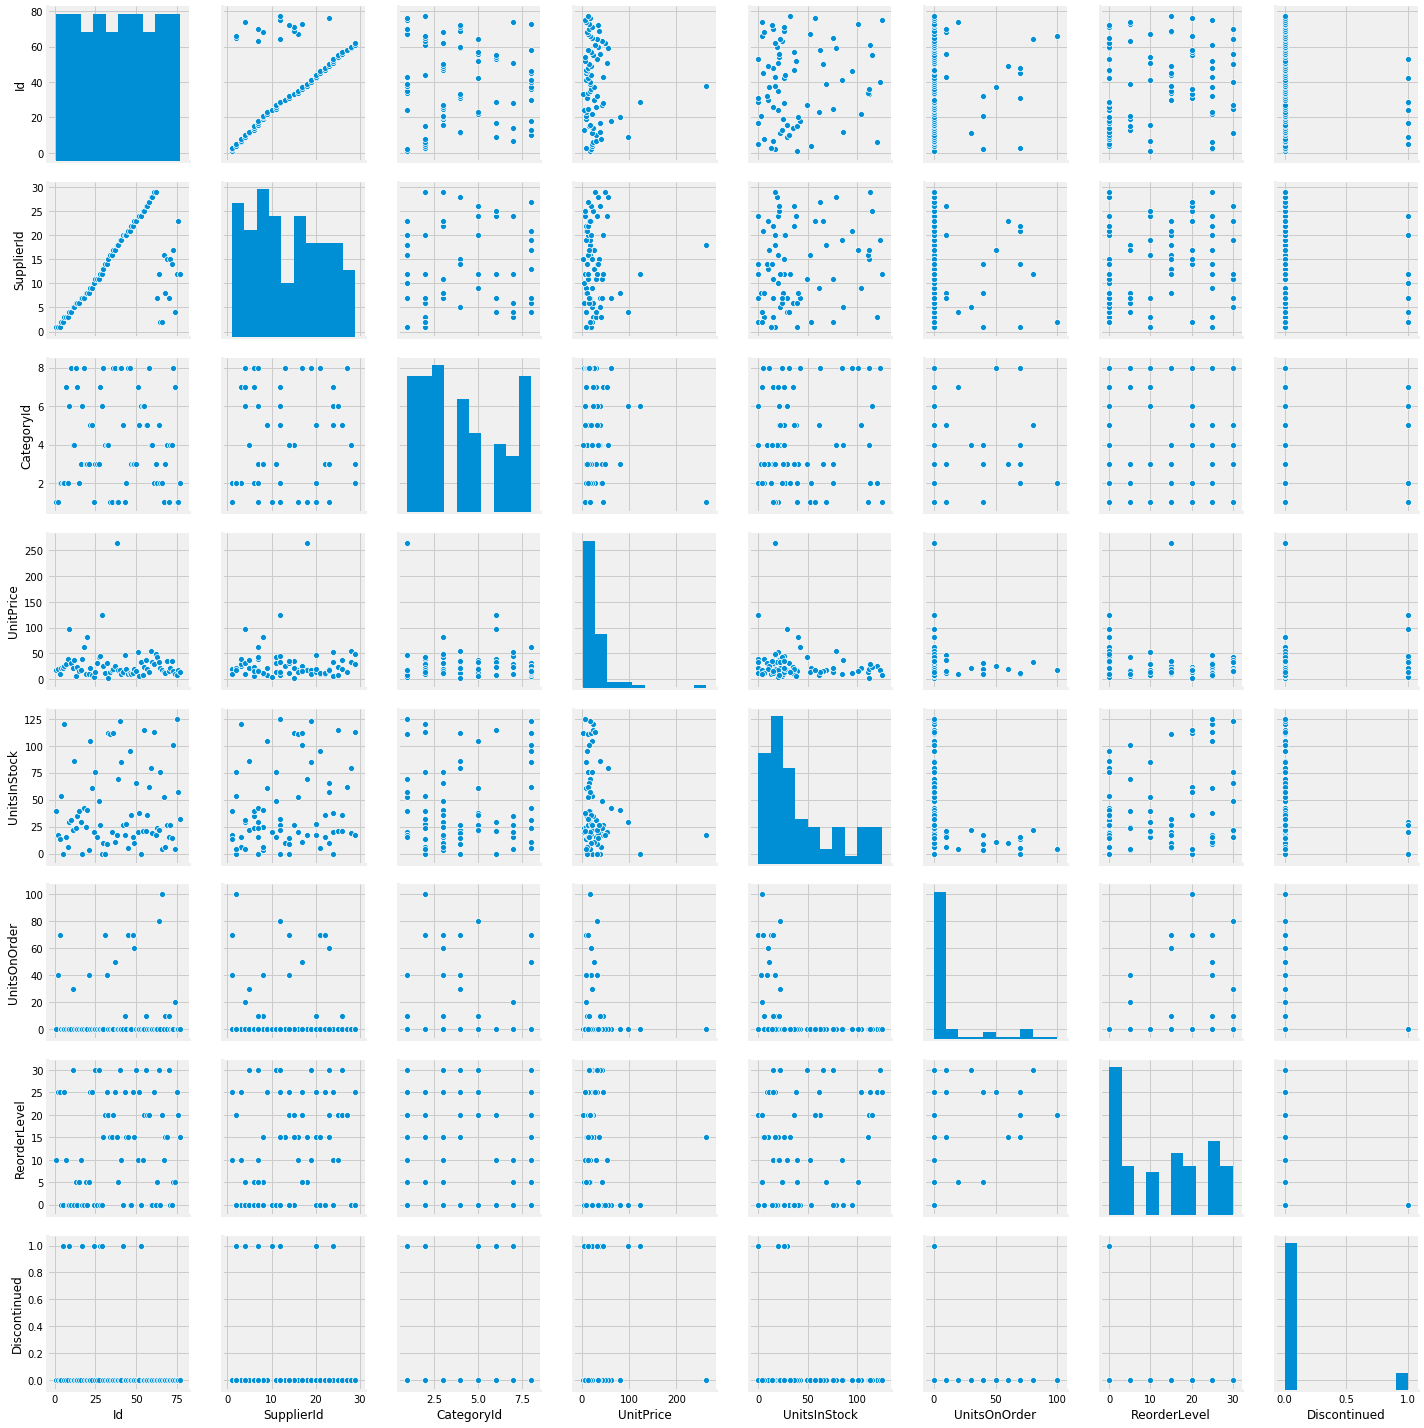

In [21]:
sns.pairplot(product_data);

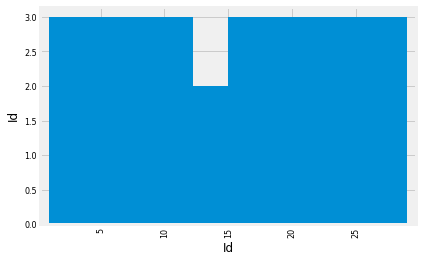

In [22]:
pd.plotting.scatter_matrix(supplier_data); 

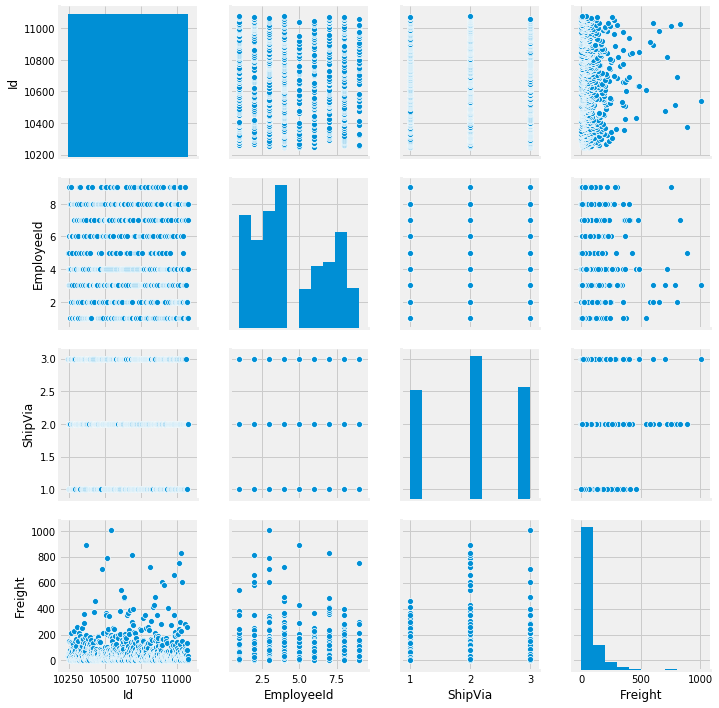

In [23]:
sns.pairplot(order_data);

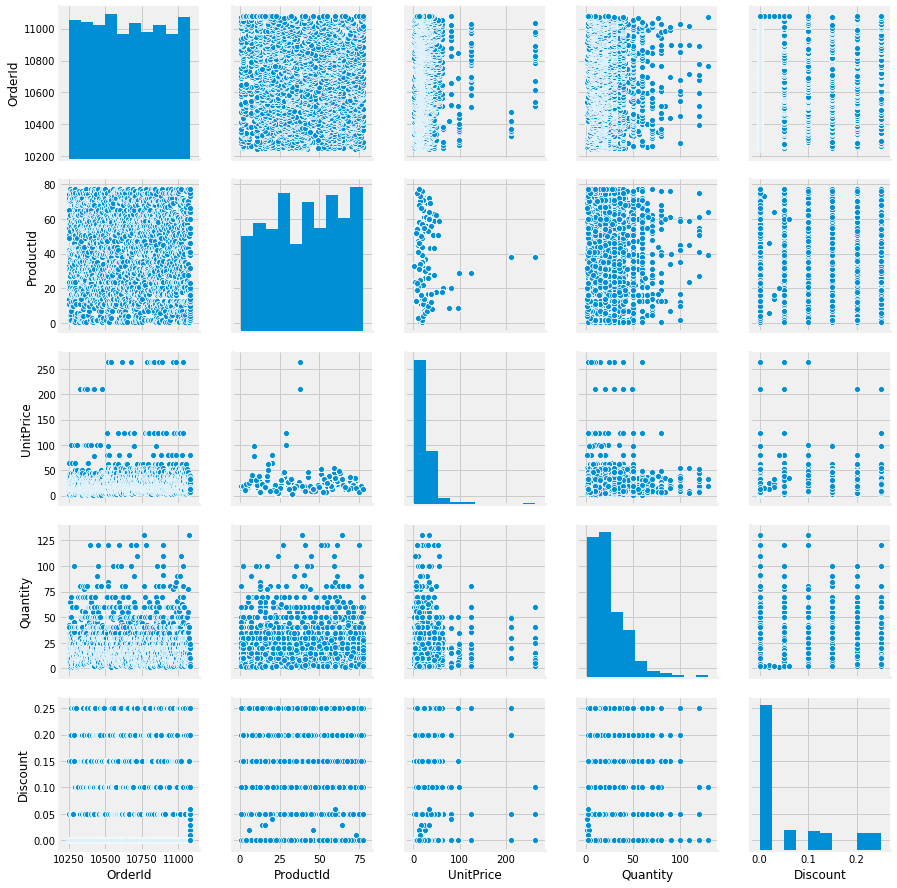

In [24]:
sns.pairplot(order_detail_data);

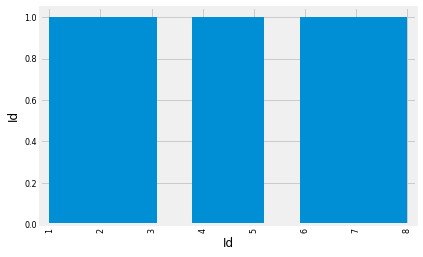

In [25]:
pd.plotting.scatter_matrix(category_data); 

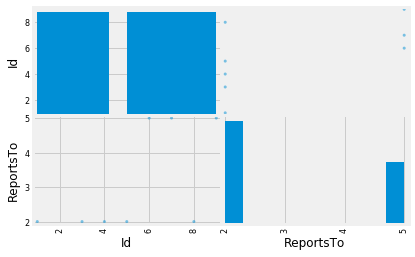

In [26]:
pd.plotting.scatter_matrix(employee_data);

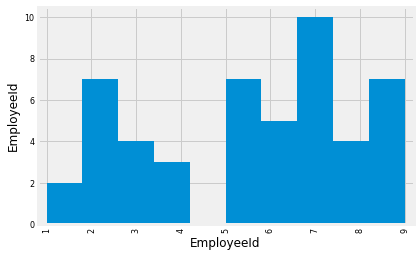

In [27]:
pd.plotting.scatter_matrix(employee_territory_data);

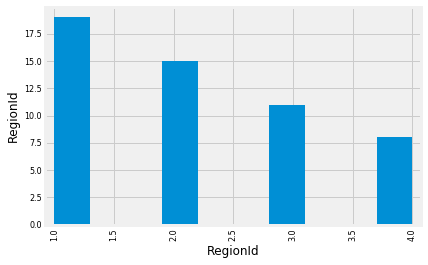

In [28]:
pd.plotting.scatter_matrix(territory_data);

Customer_data cannot be visually displayed due to indexing and formatting of the data within the table. 

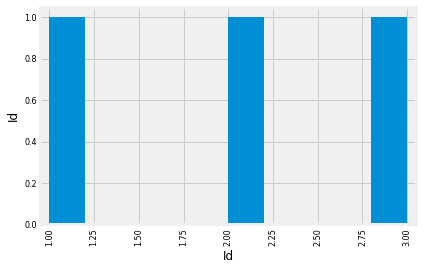

In [29]:
pd.plotting.scatter_matrix(shipper_data);

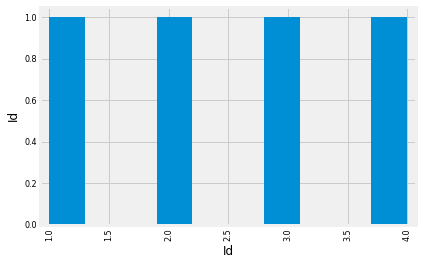

In [30]:
pd.plotting.scatter_matrix(region_data);

#### Final thoughts:
<br />
A lot of the data within this database is categorical in nature.
None of the continuous data displays a normal distribution with data being skewed and/or displaying varying degrees of kurtosis. Nonparametric testing must be used as a result. 

### Revenue

In [31]:
#Breakdown revenue per region, freight spend per region
cur.execute("""SELECT * FROM [Order]
                JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId""")
revenue= pd.DataFrame(cur.fetchall())
revenue.columns = [x[0] for x in cur.description]
revenue['Revenue'] = revenue.Quantity * revenue.UnitPrice
revenue.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0,168.0


Converting OrderDate to datetime for easier data manipulation.

In [32]:
revenue['OrderDate'] = revenue['OrderDate'].astype('datetime64[ns]')
revenue['YearOrdered'] = revenue['OrderDate'].dt.year
revenue['MonthOrdered'] = revenue['OrderDate'].dt.month
revenue['Month_Year'] = revenue['MonthOrdered'].map(str) + '-' + revenue['YearOrdered'].map(str)

In [33]:
revenue.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Revenue,YearOrdered,MonthOrdered,Month_Year
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,10248/11,10248,11,14.0,12,0.0,168.0,2012,7,7-2012


Parsing revenue by year/

In [34]:
revenue['YearOrdered'].unique()

array([2012, 2013, 2014], dtype=int64)

Grouping revenue by year to create clean visual

In [35]:
aggregation_functions = {'Revenue': 'sum', 'Month_Year': 'first', 'CustomerId': 'first', 'Freight': 'first', 
                         'ShipVia': 'first', 'OrderDate': 'first'}
rev_viz = revenue.groupby(revenue['Month_Year']).aggregate(aggregation_functions)
rev_viz.sort_values(by='OrderDate', inplace=True)

In [36]:
rev_viz.head(1)

,Revenue,Month_Year,CustomerId,Freight,ShipVia,OrderDate
Month_Year,,,,,,
7-2012,30192.1,7-2012,VINET,32.38,3,2012-07-04


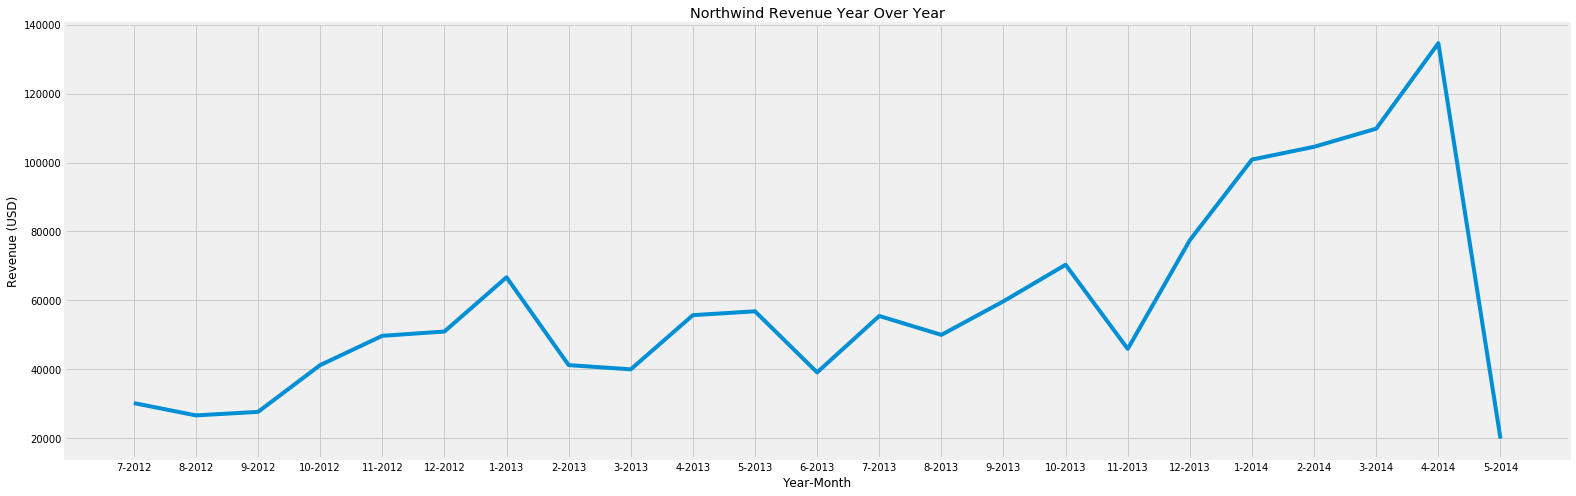

In [37]:
fig = plt.figure(figsize=(24,8))
ax = plt.axes()
ax.plot(rev_viz.Month_Year, rev_viz.Revenue);
plt.title('Northwind Revenue Year Over Year');
plt.xlabel('Year-Month');
plt.ylabel('Revenue (USD)');

Revenue has displayed an accelerated growth trend beginning in Novebmer on 2013.

#### Orders by month visualisation

In [38]:
order_Id = revenue.OrderId
order_Id = pd.DataFrame(order_Id)
order_rev = revenue.Revenue
order_rev = pd.DataFrame(order_rev)
order_my = revenue['Month_Year']
order_date = revenue['OrderDate']
couple = [order_Id, order_rev, order_my, order_date]
revId = pd.concat(couple, join = 'outer', axis=1)
revId.head()

,OrderId,Revenue,Month_Year,OrderDate
0,10248,168.0,7-2012,2012-07-04
1,10248,98.0,7-2012,2012-07-04
2,10248,174.0,7-2012,2012-07-04
3,10249,167.4,7-2012,2012-07-05
4,10249,1696.0,7-2012,2012-07-05


In [39]:
print(len(order_Id), len(order_rev))

2155 2155


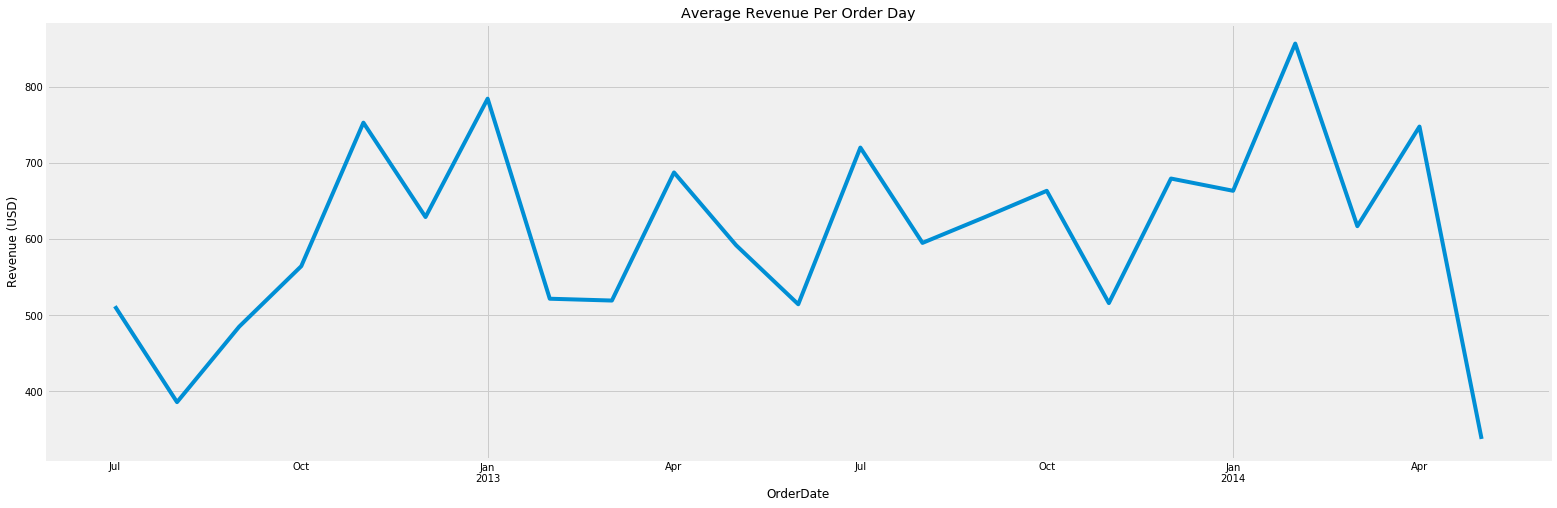

In [40]:
revId.set_index('OrderDate').resample('m')['Revenue'].mean().plot(figsize=[24,8])
plt.title('Average Revenue Per Order Day');
plt.ylabel('Revenue (USD)');

Average revenue accrued by order has trended downard beginning in January of 2014.

# Hypotehsis synthesis and testing

## Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
<br />
* $H_{0}$: Discount amount plays no role in product quantity in an order.<br />
* $H_{1}$: Discount amount significantly affects product quantity in an order.

#### Retrieving Pertinent Data

In [41]:
display(order_detail_data.head())
display("----Discount counts----", order_detail_data['Discount'].value_counts())

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


'----Discount counts----'

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [42]:
#parsing out data by discount level
#I combined discount levels 1 to 6 due to the small sample sizes
discount_yes = order_detail_data.loc[order_detail_data['Discount'] != 0.00]
discount_no = order_detail_data.loc[order_detail_data['Discount'] == 0.00]
discount_10 = order_detail_data.loc[order_detail_data['Discount'] == 0.10]
discount_15 = order_detail_data.loc[order_detail_data['Discount'] == 0.15]
discount_20 = order_detail_data.loc[order_detail_data['Discount'] == 0.20]
discount_25 = order_detail_data.loc[order_detail_data['Discount'] == 0.25]

In [43]:
cur.execute("""SELECT * FROM OrderDetail 
            WHERE Discount > 0.00 AND Discount <= 0.06""")
discount_1_to_6 = pd.DataFrame(cur.fetchall())
discount_1_to_6.columns = [x[0] for x in cur.description]
display(len(discount_1_to_6))
discount_1_to_6.head(1)

193

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10251/22,10251,22,16.8,6,0.05


In [44]:
disc_libraries = {'discount_yes': discount_yes, 'discount_1_to_6': discount_1_to_6, 
                 'discount_10': discount_10, 'discount_15': discount_15, 'discount_20': discount_20, 
                 'discount_25': discount_25}

for key, value in disc_libraries.items():
    print('There are {} values in {}'.format(len(value), key))

There are 838 values in discount_yes
There are 193 values in discount_1_to_6
There are 173 values in discount_10
There are 157 values in discount_15
There are 161 values in discount_20
There are 154 values in discount_25


In [45]:
a = discount_no['Quantity'].tolist()
b = discount_yes['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b

In [46]:
diff_mu_a_b

-5.394523243866239

In [47]:
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)

(1317, 1)

(838, 1)

In [48]:
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff

0.16067742736348478

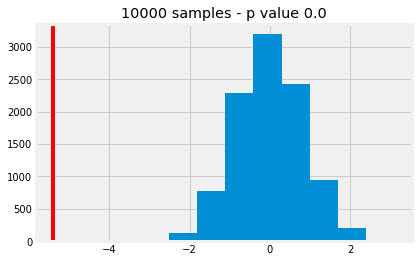

In [49]:
sample_diffs = []
counter = 0
x = 10000
for i in range(x):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f'{x} samples - p value {counter/x}');

There is a significant difference between the mean quantity of items ordered when a discount is applied vs when there is not. Further examination must happen to determine the extent of the effect. 

In [50]:
def monte(list1, list2, label):
    x=10000
    diff_mu_list1_list2 = np.mean(list1) - np.mean(list2)
    all_data =  list1 + list2
    diff_mu_list1_list2
    df = pd.DataFrame({'all_data':all_data})
    sample_a = df.sample(replace = False, n = len(list1))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_mean_diff
    sample_diffs = []
    counter = 0
    for i in range(x):
        sample_a = df.sample(replace = False, n = len(list1))
        sample_b = df.drop(sample_a.index, axis = 0)
        sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
        sample_diffs.append(sample_mean_diff)
        if sample_mean_diff < diff_mu_list1_list2:
            counter += 1
    plt.hist(sample_diffs);
    plt.axvline(diff_mu_list1_list2, color = 'red');
    plt.title(f' {label}\n {x} samples - p value {counter/x}');
    plt.show()
    beta = 1 - (counter/x)
    print('Beta value:', beta)

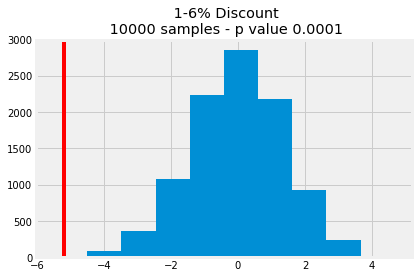

Beta value: 0.9999


In [51]:
monte(discount_no['Quantity'].tolist(), discount_1_to_6['Quantity'].tolist(), '1-6% Discount')

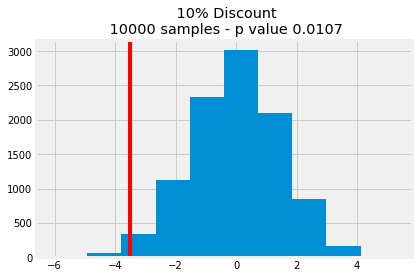

Beta value: 0.9893


In [52]:
monte(discount_no['Quantity'].tolist(), discount_10['Quantity'].tolist(), '10% Discount')

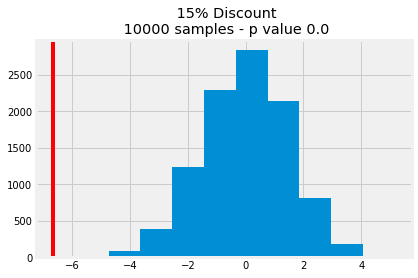

Beta value: 1.0


In [53]:
monte(discount_no['Quantity'].tolist(), discount_15['Quantity'].tolist(), '15% Discount')

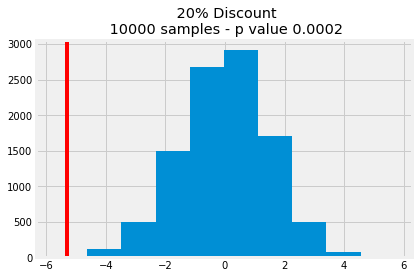

Beta value: 0.9998


In [54]:
monte(discount_no['Quantity'].tolist(), discount_20['Quantity'].tolist(), '20% Discount')

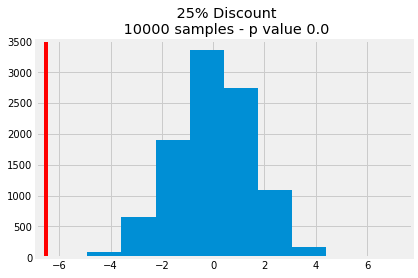

Beta value: 1.0


In [55]:
monte(discount_no['Quantity'].tolist(), discount_25['Quantity'].tolist(), '25% Discount')

#### Conclusions:
* $H_{1}$ is supported. $H_{0}$ is rejected.
* Every level of discount has a significantly higher  quantity of items ordered relative non-discounted items.than average quantity of items ordered.
* 15% discounts were the most effective in regards to increasing item quantities in an order. 
* Further investigation should be done to examine why this is so. 

## Are discounted cereal/grains ordered in higher quantities than other discounted items??
* $H_{0}$: Cereal/grains are not ordered at higher rates than other discounted items.
* $H_{1}$: Cereal/grains, category 5 products, are ordere in higher quantities than other is supported. 

In [56]:
#Are discounted cereal/grains ordered in higher quantities than other discounted items??
cur.execute("""SELECT * FROM OrderDetail
                JOIN Product ON Product.Id = OrderDetail.ProductId
                JOIN Category ON Category.Id = Product.CategoryId""")
Q2 = pd.DataFrame(cur.fetchall())
Q2.columns = [x[0] for x in cur.description]
Q2_no_d = Q2.loc[Q2['Discount'] == 0.00]
Q2_d = Q2.loc[Q2['Discount'] != 0.00]
Q2_d_5 = Q2.loc[Q2['CategoryId'] == 5]
display(len(Q2_d), len(Q2_no_d))
display(Q2_d.head(1), Q2_no_d.head(1), Q2_d_5.head(1))

838

1317

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
6,10250/51,10250,51,42.4,35,0.15,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.0,20,0,10,0,7,Produce,Dried fruit and bean curd


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
0,10248/11,10248,11,14.0,12,0.0,11,Queso Cabrales,5,4,1 kg pkg.,21.0,22,30,30,0,4,Dairy Products,Cheeses


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
1,10248/42,10248,42,9.8,10,0.0,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.0,26,0,0,1,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


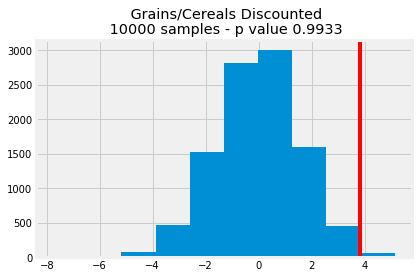

Beta value: 0.006700000000000039


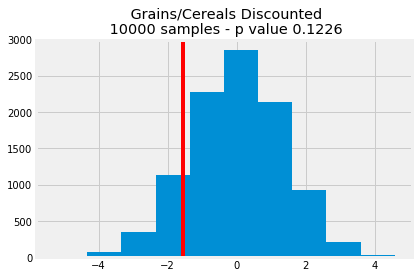

Beta value: 0.8774


In [57]:
monte(Q2_d['Quantity'].tolist(), Q2_d_5['Quantity'].tolist(), 'Grains/Cereals Discounted')
monte(Q2_no_d['Quantity'].tolist(), Q2_d_5['Quantity'].tolist(), 'Grains/Cereals Discounted')

#### Conclusions:
* $H_{0}$ is supported. Cereal/grains are not ordered at hight quantites than other discounted items. 
* $H_{1}$ is rejected.<br />
In fact, cereal/grains, are ordered in lower quantities relative to other discounted items. 

## Do countires outside of the U.S, have higher freight costs? 
* $H_{0}$ Countries outside the U.S. do not experience higher freight costs.
* $H_{1}$ Countires outside the U.S. experience higher freight costs.

In [58]:
order_data.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France


In [59]:
W_Europe = order_data.loc[order_data['ShipRegion'] == 'Western Europe']
E_Europe = order_data.loc[order_data['ShipRegion'] == 'Eastern Europe']
S_Europe = order_data.loc[order_data['ShipRegion'] == 'Southern Europe']
N_Europe = order_data.loc[order_data['ShipRegion'] == 'Northern Europe']
British_Isles = order_data.loc[order_data['ShipRegion'] == 'British Isles']
N_America = order_data.loc[order_data['ShipRegion'] == 'North America']
S_America = order_data.loc[order_data['ShipRegion'] == 'South America']
C_America = order_data.loc[order_data['ShipRegion'] == 'Central America']
Scandinavia = order_data.loc[order_data['ShipRegion'] == 'Scandinavia']

In [60]:
N_America_freight_mean = N_America.Freight.mean()

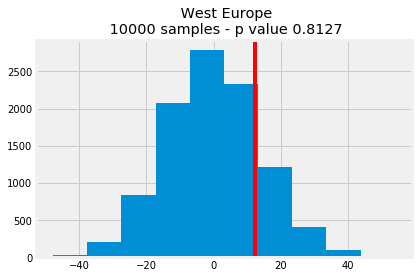

Beta value: 0.18730000000000002


In [61]:
monte(N_America['Freight'].tolist(), W_Europe['Freight'].tolist(), 'West Europe')

West Europe freight costs are not significantlty higher than North America freight rates. Ho cannot be rejected.

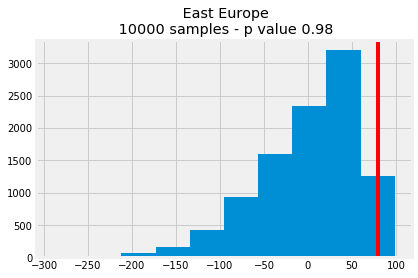

Beta value: 0.020000000000000018


In [62]:
monte(N_America['Freight'].tolist(), E_Europe['Freight'].tolist(), 'East Europe')

East Europe sample to small for comparison

South Europe freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.
Freight costs are significantly lower than North America average freight costs.

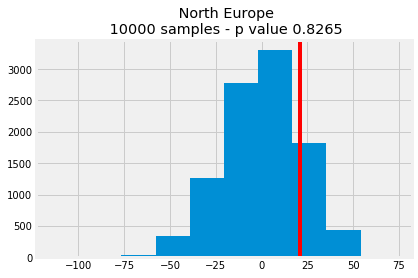

Beta value: 0.1735


In [63]:
monte(N_America['Freight'].tolist(), N_Europe['Freight'].tolist(), 'North Europe')

N Europe freight costs are not significantly higher than North America freight rates. Ho cannot be rejected.

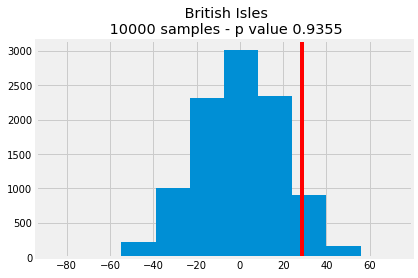

Beta value: 0.0645


In [64]:
monte(N_America['Freight'].tolist(), British_Isles['Freight'].tolist(), 'British Isles')

British_Isles freight costs are not significantly higher than North America freight rates.  Ho cannot be rejected.

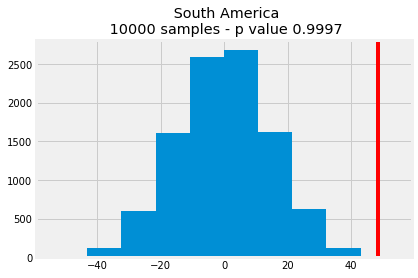

Beta value: 0.00029999999999996696


In [65]:
monte(N_America['Freight'].tolist(), S_America['Freight'].tolist(), 'South America')

South America freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.

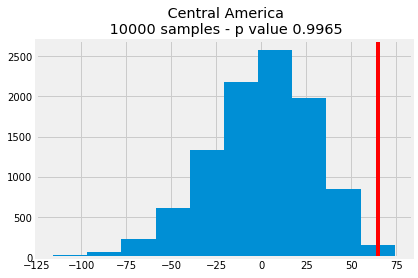

Beta value: 0.0034999999999999476


In [66]:
monte(N_America['Freight'].tolist(), C_America['Freight'].tolist(), 'Central America')

Central America freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.

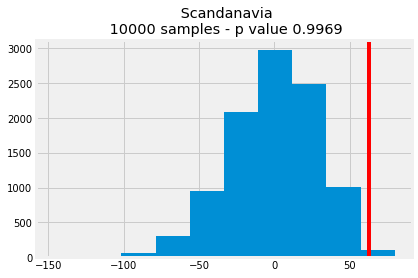

Beta value: 0.0030999999999999917


In [67]:
monte(N_America['Freight'].tolist(), Scandinavia['Freight'].tolist(), 'Scandanavia')

Scandanavia freight costs are not significantlty different from North America freight rates. Ho cannot be rejected.
#### Conclusions:
* $H_{0}$ is supported.
* $H_{1}$ is rejected.
Countires outside of the U.S. do not experience higher fregith rates. On average, their freight rates are actually lower than those of the U.S.

## What some categories of food product have higher discontinuation rates??
* $H_{0}$ No food categories have higher quatities of discontinued items.
* $H_{1}$ Some food categories have hgiher quantities of discontinued items.

In [68]:
display(category_data.head(1), product_data.head(1))

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0


In [69]:
cur.execute("""SELECT * FROM Product
                JOIN Category
                ON Product.CategoryId = Category.Id""")
product_category = pd.DataFrame(cur.fetchall())
product_category.columns = [x[0] for x in cur.description]
product_category.head(1)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,CategoryName,Description
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [70]:
product_category.CategoryName.unique()

array(['Beverages', 'Condiments', 'Produce', 'Meat/Poultry', 'Seafood',
       'Dairy Products', 'Confections', 'Grains/Cereals'], dtype=object)

In [71]:
product_category_dcd = product_category.loc[product_category['Discontinued'] == 1]
product_category_cont = product_category.loc[product_category['Discontinued'] == 0]

In [72]:
product_category1 = product_category.loc[product_category['CategoryId'] == 1]
product_category1.Discontinued.value_counts()

0    11
1     1
Name: Discontinued, dtype: int64

In [73]:
product_category.Discontinued.value_counts()

0    69
1     8
Name: Discontinued, dtype: int64

In [74]:
from scipy.stats import chi2_contingency

In [75]:
chi2_contingency([58, 7], [11, 1])

(0.0, 1.0, 0, array([58.,  7.]))

#### Conclusions:
* $H_{0}$ is supported.
* $H_{1}$ is rejected. <br />
No category of food product is discontinued at a higher rate than others.